In [1]:
import ORIENT as ot
from datetime import datetime
#define the omni source


start_time = datetime(2013,3,15)
end_time = datetime(2013,3,20)
omni_source = ot.omni.load.input_var(name = ['AE_INDEX','AL_INDEX','SYM_H','flow_speed','Pressure','BZ_GSM'],
                                                   start_time= datetime.strftime(start_time,"%Y-%m-%d"),
                                                   end_time= datetime.strftime(end_time,"%Y-%m-%d"),
                                                   no_update = False,data_type='5min')
al_data = omni_source.get_data('AL_INDEX',gap_fill=False)
symh_data = omni_source.get_data('SYM_H',gap_fill=False)
pressure_data = omni_source.get_data('Pressure',gap_fill=False)
flowspeed_data = omni_source.get_data('flow_speed',gap_fill=False)

18-May-22 17:45:21: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_5min/2013/
18-May-22 17:45:21: File is current: omni_data/hro2_5min/2013/omni_hro2_5min_20130301_v01.cdf


# get flux


In [2]:
channel_number = 11
flux_source = ot.eflux.real.TrajFlux(instrument = 'mageis',channel = channel_number)

select_framea, select_frameb = flux_source.get_flux(start_time,end_time)


ORIENT initialized, Getting eflux from: mageis channel: 11


18-May-22 17:46:13: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_5min/2013/


version DM
startmin -14400
endmin 0
lagstep 60
input ['al', 'dst', 'pressure', 'flow_speed']
ORIENT-M initialized, Getting eflux from: mageis channel: 11
Start loading the data... np_update is: False


18-May-22 17:46:13: File is current: omni_data/hro2_5min/2013/omni_hro2_5min_20130301_v01.cdf


filling gap of ['AE_INDEX', 'AL_INDEX', 'SYM_H', 'flow_speed', 'Pressure', 'BZ_GSM']
filling gap of ['AE_INDEX', 'AL_INDEX', 'SYM_H', 'flow_speed', 'Pressure', 'BZ_GSM']
filling gap of ['AE_INDEX', 'AL_INDEX', 'SYM_H', 'flow_speed', 'Pressure', 'BZ_GSM']
filling gap of ['AE_INDEX', 'AL_INDEX', 'SYM_H', 'flow_speed', 'Pressure', 'BZ_GSM']
filling gap of ['AE_INDEX', 'AL_INDEX', 'SYM_H', 'flow_speed', 'Pressure', 'BZ_GSM']
Loading data finished!


2022-05-18 17:46:17.644176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


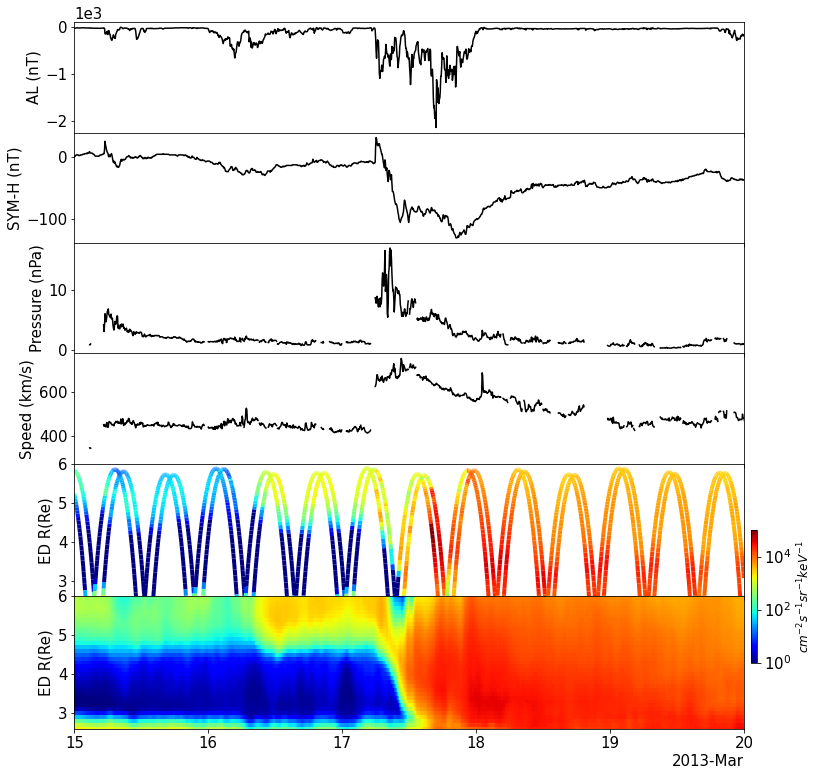

In [4]:
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size': 15})

fig,ax = plt.subplots(6,1,figsize = (12,13),sharex=True,gridspec_kw={'height_ratios': [1,1,1,1,1.2, 1.2]})
plt.subplots_adjust( hspace=0)

ax[0].ticklabel_format(style='sci', axis='y', scilimits=(3,3))
ax[0].plot(al_data.index,al_data.values,color = 'black')
ax[0].set_ylabel('AL (nT)',fontsize = 15)

#ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1].plot(symh_data.index,symh_data.values,color = 'black')
ax[1].set_ylabel('SYM-H (nT)',fontsize = 15)

#ax[2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[2].plot(pressure_data.index,pressure_data.values,color = 'black')
ax[2].set_ylabel('Pressure (nPa)',fontsize = 15)

#ax[3].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[3].plot(flowspeed_data.index,flowspeed_data.values,color = 'black')
ax[3].set_ylabel('Speed (km/s)',fontsize = 15)

lc_real_a = ot.eflux.real.plot_real_flux(ax[4],select_framea,flux_min = 1,flux_max = 5,use_L = 'ED_R')
lc_real_b = ot.eflux.real.plot_real_flux(ax[4],select_frameb,flux_min = 1,flux_max = 5,use_L = 'ED_R')

ax[4].set_ylim(2.6, 6)



# get model
input_time = datetime(2013,3,19)
eflux_2 =  ot.eflux.model.ElectronFlux(start_time, end_time,instrument = 'mageis',channel = channel_number)
final_frame, X_input_total = eflux_2.get_flux(dst_source='omni',
                 al_source='omni',
                 sw_source='omni',use_omni = True,use_traj = False,get_input_time = input_time,get_MLT_flux=False,
                                             selected_MLT_datetime = input_time)
model_eq = eflux_2.make_flux_plot(ax[5],normmax = 10**5)

ax[5].set_ylim(2.6, 6)
ax[4].set_ylabel('ED R(Re)',fontsize = 15)
ax[5].set_ylabel('ED R(Re)',fontsize = 15)
plt.xlim(start_time,end_time)
# add colorbar

color_axis_1 = inset_axes(ax[4], width="1%",  # width = 5% of parent_bbox width
                                 height="100%",
                                 loc='lower left',
                                 bbox_to_anchor=(1.01, -0.5, 1, 1),
                                 bbox_transform=ax[4].transAxes,
                                 borderpad=0,
                                )



cb1 = fig.colorbar(model_eq , cax=color_axis_1)
cb1.ax.tick_params(labelsize=15) 
cb1.set_label(label=r'$cm^{-2}s^{-1}sr^{-1}keV^{-1}$',fontsize = 12)



